<a href="https://colab.research.google.com/github/kodeu/smartphones_prices/blob/gbm/phones_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving smartphones.csv to smartphones (6).csv
User uploaded file "smartphones (6).csv" with length 146107 bytes
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 1452, number of used features: 39
[LightGBM] [Info] Start training from score 484.612314
(364, 6)
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
GBM RMSE: 213.08203354154088
Coefficient of Determination (R^2): 0.7588853203021549


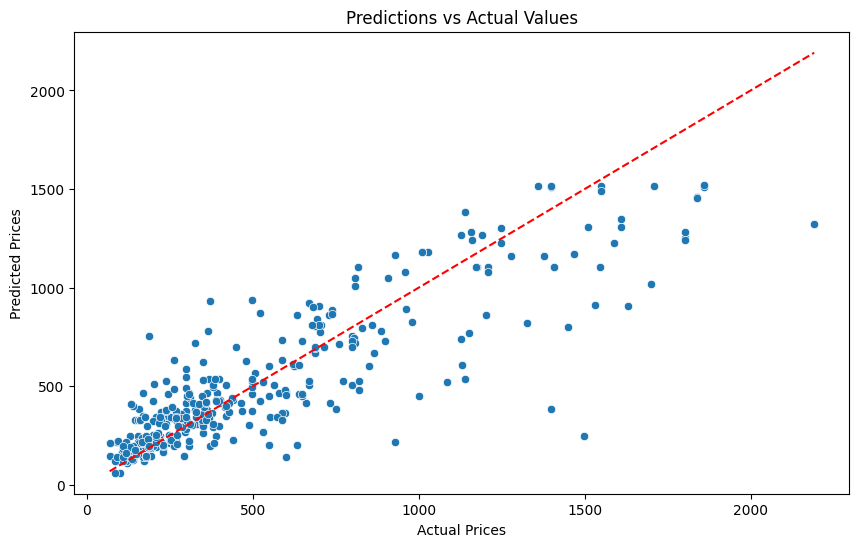

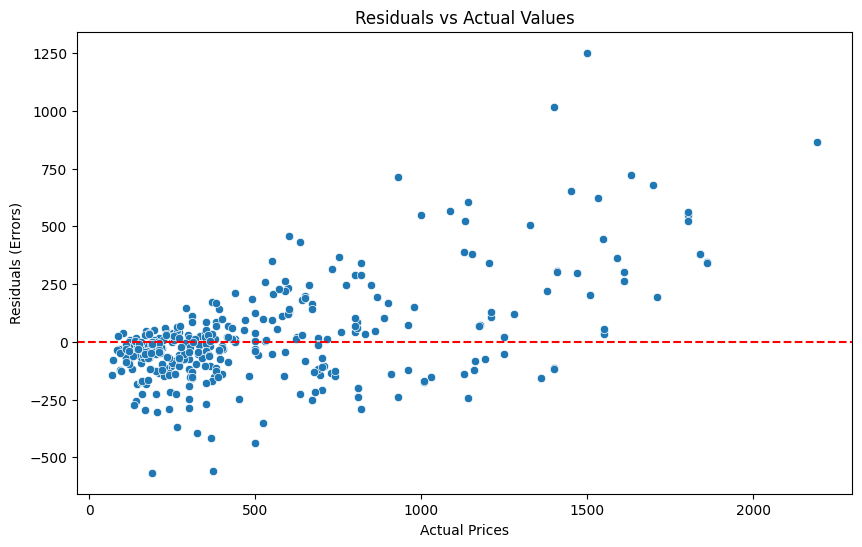

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files
import pandas as pd
import io
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

# Assuming 'df' is your DataFrame with features and 'price' as the target variable
X = data.drop(columns=['Final Price', 'Smartphone'])
y = data['Final Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'n_estimators': 100  # Number of boosting rounds
}

# Create a pipeline with preprocessing and model training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(**params))
])

# Train the model
model.fit(X_train, y_train)
print(X_test.shape)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"GBM RMSE: {rmse}")
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

#plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x=y_test, y=y_pred)  # Create a scatter plot
plt.title('Predictions vs Actual Values')  # Set title
plt.xlabel('Actual Prices')  # Set x-axis label
plt.ylabel('Predicted Prices')  # Set y-axis label

# Plot a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

#plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()